#TeamMates: Pkaur6 ,agundroo

Influenza national summary (green and yellow chart)

This data is from clinical Laboratories
We have used ggplot2 to make this graph along with geom_bar and geom_path.
For additional axis, we have used scale_y_continuous for the secondary y axis. 
A and B bars according to data are stacked on top of each other.

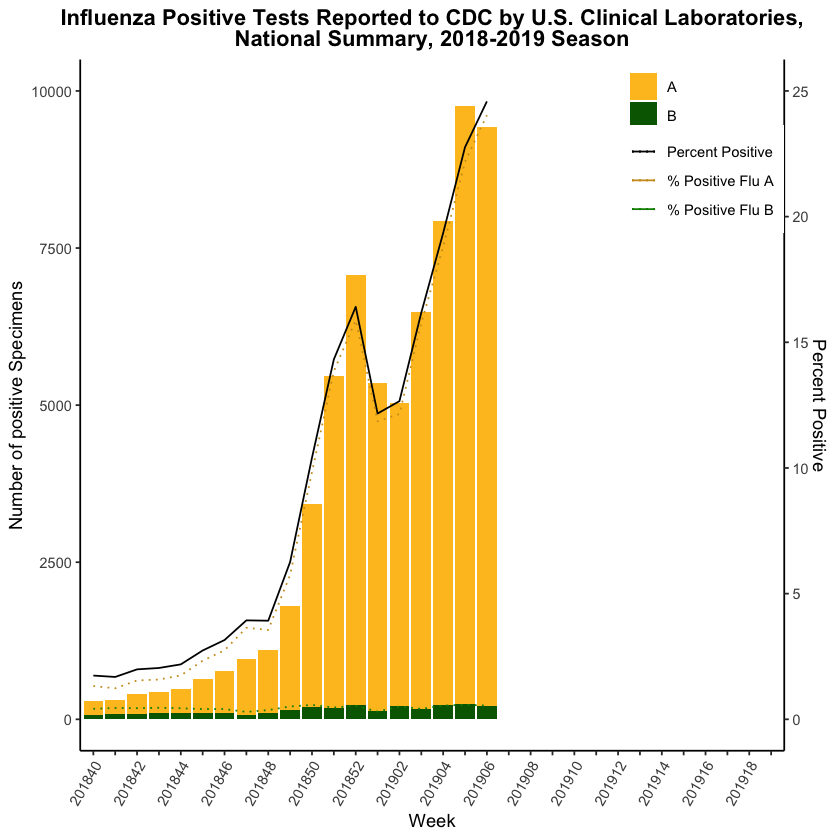

In [24]:

library("ggplot2")
ns1<-read.csv("ns.csv")
data1<-data.frame(x=format(ns1$YEARWEEK,scientific=FALSE),y=ns1$COUNT,fill_var=ns1$TYPE)
TOTAL_A <- subset(ns1, ns1$COUNT > 0)
my_breaks <- format(ns1$YEARWEEK,scientific=FALSE)
label_fill <- function(orig, .offset=0, .mod=4, .fill=""){
    ii <- as.logical(
        ## offset==0 keeps first
        (1:length(orig)-1+.offset) %% .mod
    )
    orig[ii] <- .fill
    orig
}
PERCENT_POSITIVE<- subset(ns1, ns1$PERCENT.POSITIVE > 0)
p<-ggplot() +ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\nNational Summary, 2018-2019 Season")+
geom_bar(data1,mapping=aes(x=data1$x,y=data1$y,fill=data1$fill_var),stat = "identity")
q<-p +labs( x="Week", y="Number of positive Specimens")+coord_cartesian(ylim = c(0,10000))+theme(axis.text.x = element_text(angle = 60, hjust = 1))
a<-q+scale_y_continuous(sec.axis = sec_axis(~ ./400, name = "Percent Positive"))+geom_path(PERCENT_POSITIVE,mapping = aes(x =format(PERCENT_POSITIVE$YEARWEEK,scientific=FALSE), y = PERCENT_POSITIVE$PERCENT.POSITIVE*400,group = 3,color="PP"))+geom_path(TOTAL_A,mapping = aes(x =format(TOTAL_A$YEARWEEK,scientific=FALSE), y = TOTAL_A$PERCENT.A*400,group = 3,color="PPA"),linetype = "dotted")
mygraph<- a+geom_path(TOTAL_A,mapping = aes(x =format(TOTAL_A$YEARWEEK,scientific=FALSE), y = TOTAL_A$PERCENT.B*400,group = 4 , color="PPB"),linetype = "dotted")+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black"))
mynewgraph <-mygraph+ scale_color_manual(name="",labels = c("Percent Positive", "% Positive Flu A","% Positive Flu B"),values = c("PP"= "black", "PPA"="goldenrod3","PPB"="green4"))+ scale_fill_manual("",labels=c("A","B"),values=c("A"="goldenrod1","B"="dark green"))+theme(legend.key = element_blank(),legend.justification = c(1, 1), legend.position = c(1, 1),legend.spacing.y = unit(-0.3, "cm"),plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))
mynewgraph + scale_x_discrete(breaks=my_breaks, labels=label_fill(my_breaks, .mod=4))

Positive tested

This data is from Public health Laboratories
We have used ggplot2 to make this graph along with geom_bars for all the strains.
Bars for strains are stacked on top in the order specified in legend.

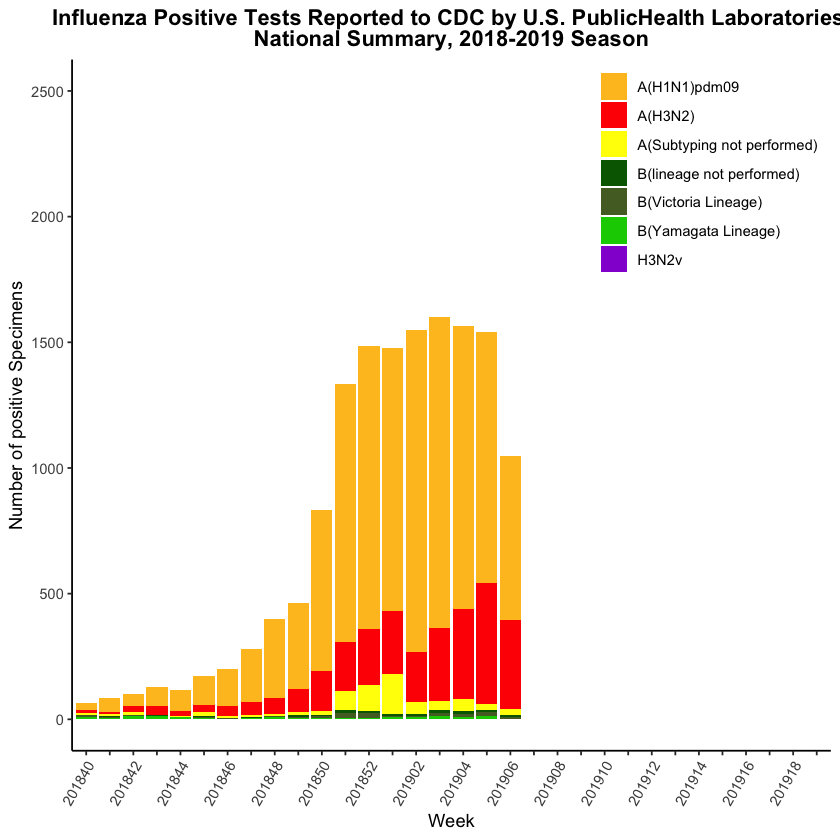

In [2]:
library("ggplot2")

ps1<-read.csv("ps1.csv")

my_breaks <- format(ps1$YEARWEEK,scientific=FALSE)
label_fill <- function(orig, .offset=0, .mod=2, .fill=""){
     ## replace
    ii <- as.logical(
        ## offset==0 keeps first
        (1:length(orig)-1+.offset) %% .mod
    )
    orig[ii] <- .fill
    orig
}

p<-ggplot() +ggtitle("Influenza Positive Tests Reported to CDC by U.S. PublicHealth Laboratories,\nNational Summary, 2018-2019 Season")+
 geom_bar(aes(y = ps1$COUNT, x = format(ps1$YEARWEEK,scientific=FALSE), fill = ps1$TYPE),stat="identity",position = position_stack(reverse = FALSE))
x<-p+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black"))
w<-x+labs( x="Week", y="Number of positive Specimens")+coord_cartesian(ylim = c(0,2500))+theme(axis.text.x = element_text(angle = 60, hjust = 1))
mynewgraph<-w+ scale_fill_manual("",labels=c("A(H1N1)pdm09","A(H3N2)","A(Subtyping not performed)","B(lineage not performed)","B(Victoria Lineage)","B(Yamagata Lineage)","H3N2v"),values=c("A_Subtyping_not_Performed"="yellow","A_H1N1"="goldenrod1","A_H3"="red","H3N2v"="darkviolet","B"="darkgreen","BVic"="darkolivegreen","BYam"="green3"))+theme(legend.key = element_blank(),legend.justification = c(1, 1), legend.position = c(1, 1),legend.spacing.y = unit(-0.3, "cm"),plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))
mynewgraph + scale_x_discrete(breaks=my_breaks, labels=label_fill(my_breaks, .mod=2)) 


Pediatric deaths

This graph shows the number of death reported (previous and current) wrt weeks for 4 sessions( 2015-16, 2016-17,2017-18,2018-19) for Influenza.
We have used ggplot2 to make this graph along with geom_bar.


Warning message:
“position_stack requires non-overlapping x intervals”

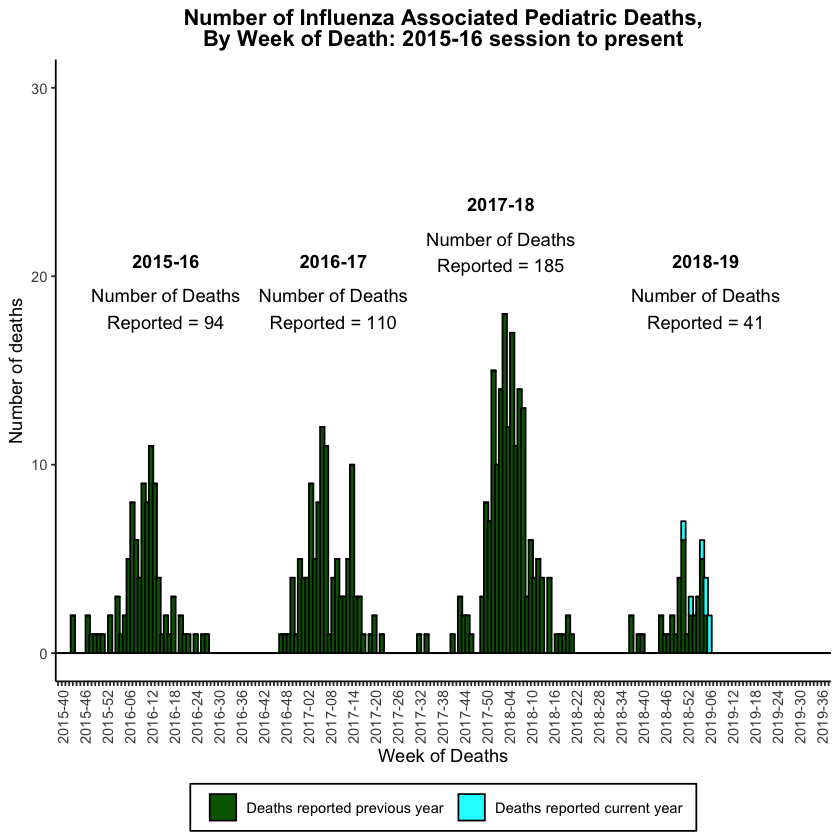

In [56]:
library("ggplot2")
pd1<-read.csv("pediatricdeath.csv")
df <- data.frame(x=pd1$WEEK.NUMBER,y=pd1$COUNT,fill_var=pd1$WEEK)
total16<-paste("\n Number of Deaths \nReported =",sum(pd1$NO_OF_DEATHS[1:98])/2)
total17<-paste("\n Number of Deaths \nReported =",sum(pd1$NO_OF_DEATHS[99:202])/2)
total18<-paste("\n Number of Deaths \nReported =",sum(pd1$NO_OF_DEATHS[203:310])/2)
total19<-paste("\n Number of Deaths \nReported =",sum(pd1$NO_OF_DEATHS[311:416])/2)
 my_breaks <- format(pd1$WEEK.NUMBER,scientific=FALSE)
 label_fill <- function(orig, .offset=0, .mod=12, .fill=""){
      ## replace
     ii <- as.logical(
         ## offset==0 keeps first
         (1:length(orig)-1+.offset) %% .mod
     )
     orig[ii] <- .fill
     orig
 }
 p<-ggplot(df,aes(x=x,y=y,fill=fill_var,group=1)) +ggtitle("Number of Influenza Associated Pediatric Deaths,\nBy Week of Death: 2015-16 session to present")+ geom_bar(color="black",stat="identity",width=1.2,position=position_stack(vjust = 1, reverse = FALSE))
 x<-p+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black"))
 w<-x+labs( x="Week of Deaths", y="Number of deaths")+coord_cartesian(ylim = c(0,30))+theme(axis.text.x = element_text(angle = 90, hjust = 1))
 mynewgraph<-w+theme(legend.key = element_blank(),legend.position="bottom",legend.background = element_rect(linetype = 1, size = 0.5, colour = "black"),legend.spacing.y = unit(-0.3, "cm"),plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))
 graph<-mynewgraph + scale_x_discrete(breaks=my_breaks, labels=label_fill(my_breaks, .mod=12))+ scale_fill_manual("",label=c("Deaths reported current year","Deaths reported previous year"),values=c("cyan","darkGreen"))
mygraph<-graph+guides(fill = guide_legend(reverse=T))
mygraph+annotate("text",x=30, y=20,label='atop(bold("2015-16"))',parse=TRUE)+
annotate("text",x=30, y=19,label=total16)+
annotate("text",x=75, y=20,label='atop(bold("2016-17"))',parse=TRUE)+
annotate("text",x=75, y=19,label=total17)+
annotate("text",x=120, y=23,label='atop(bold("2017-18"))',parse=TRUE)+
annotate("text",x=120, y=22,label=total18) +
annotate("text",x=175, y=20,label='atop(bold("2018-19"))',parse=TRUE) +
annotate("text",x=175, y=19,label=total19) 
  
  
  


Influenza-like illness
This graph is for influenza like illnesses encountered wrt to weeks.
We have used ggplot2 with geom line to make the lines for various years helping us study the trend.

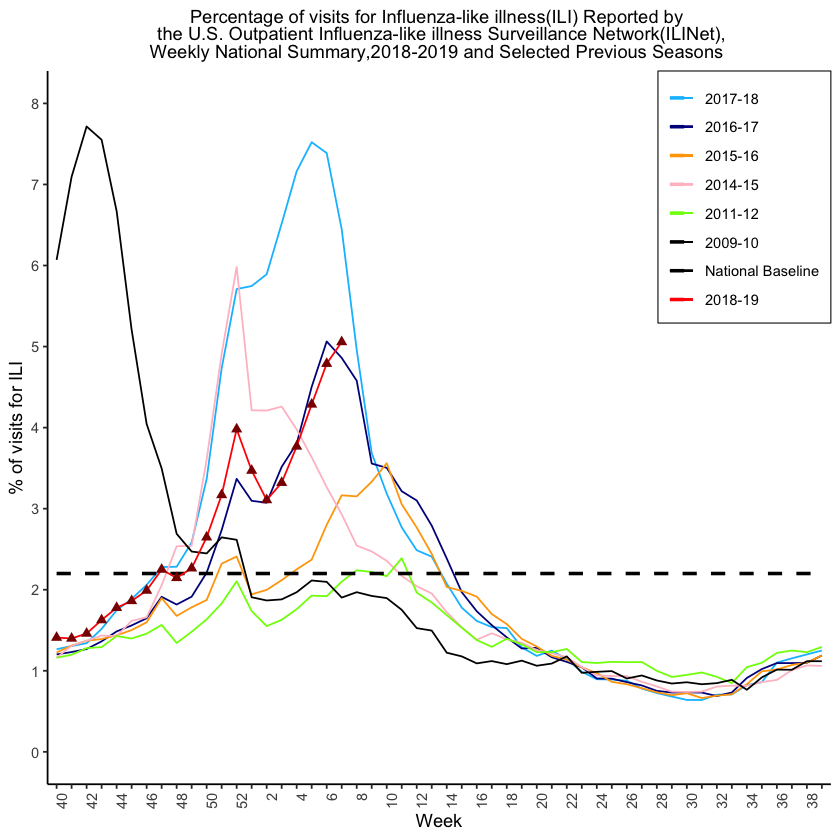

In [61]:
library("ggplot2")
ld1<-read.csv("Ili.csv")
data<-data.frame(x=factor(ld1$WEEK , levels=unique(ld1$WEEK )),stringsAsFactors=FALSE)
datanew<-subset(ld1, ld1$Year2018_19 > 0)
datan<-data.frame(x=factor(datanew$WEEK , levels=unique(datanew$WEEK )),stringsAsFactors=FALSE)
my_breaks <-ld1$WEEK
 label_fill <- function(orig, .offset=0, .mod=2, .fill=""){
      ## replace
     ii <- as.logical(
         ## offset==0 keeps first
         (1:length(orig)-1+.offset) %% .mod
     )
     orig[ii] <- .fill
     orig
 }

p<-ggplot() +ggtitle("Percentage of visits for Influenza-like illness(ILI) Reported by \n the U.S. Outpatient Influenza-like illness Surveillance Network(ILINet),\nWeekly National Summary,2018-2019 and Selected Previous Seasons ")
x<-p+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black"))
w<-x+labs( x="Week", y="% of visits for ILI")+coord_cartesian(ylim = c(0,8))+theme(axis.text.x = element_text(angle = 90, hjust = 1))
mynewgraph<-w+theme(legend.key = element_blank(),legend.justification=c(1,1),legend.position=c(1,1),legend.background = element_rect(linetype = 1, size = 0.3, colour = "black"),legend.spacing.y = unit(-0.3, "cm"),plot.title = element_text(lineheight=.8,hjust=0.5,size=11))
graph<-mynewgraph + scale_x_discrete(breaks=my_breaks, labels=label_fill(my_breaks, .mod=2))+ scale_y_continuous(breaks=seq(0,8,1))
grapha<-graph+geom_line(data,mapping = aes(x =data$x, y = ld1$Year2017_18,group=1,color="A"))+geom_line(data,mapping = aes(x =data$x, y = ld1$Year2016_17,group=2,color="B"))+geom_line(data,mapping = aes(x =data$x, y = ld1$Year2015_16,group=1,color="C"))
graph1<-grapha+geom_line(data,mapping = aes(x =data$x, y = ld1$Year2014_15,group=1,color="D"))+geom_line(data,mapping = aes(x =data$x, y = ld1$Year2011_12,group=1,color="E"))+geom_line(data,mapping = aes(x =data$x, y = ld1$Year2009_10,group=1,color="F"))
graph2<-graph1+geom_line(data,mapping = aes(x =data$x, y = ld1$National.Baseline,group=1,color="G"),linetype = 2,size=1)+geom_line(datan,mapping = aes(x =datan$x, y = datanew$Year2018_19,group=1,color="H"))+geom_point(aes(x =datan$x, y = datanew$Year2018_19),color="red4",shape=17,size=2)
graph2+scale_color_manual(name="",labels=c("2017-18","2016-17","2015-16","2014-15","2011-12","2009-10","National Baseline","2018-19"),values=c("A"="deepskyblue1","B"="darkblue","C"="orange","D"="pink","E"="lawngreen","F"="black","G"="black","H"="red"))

part 5

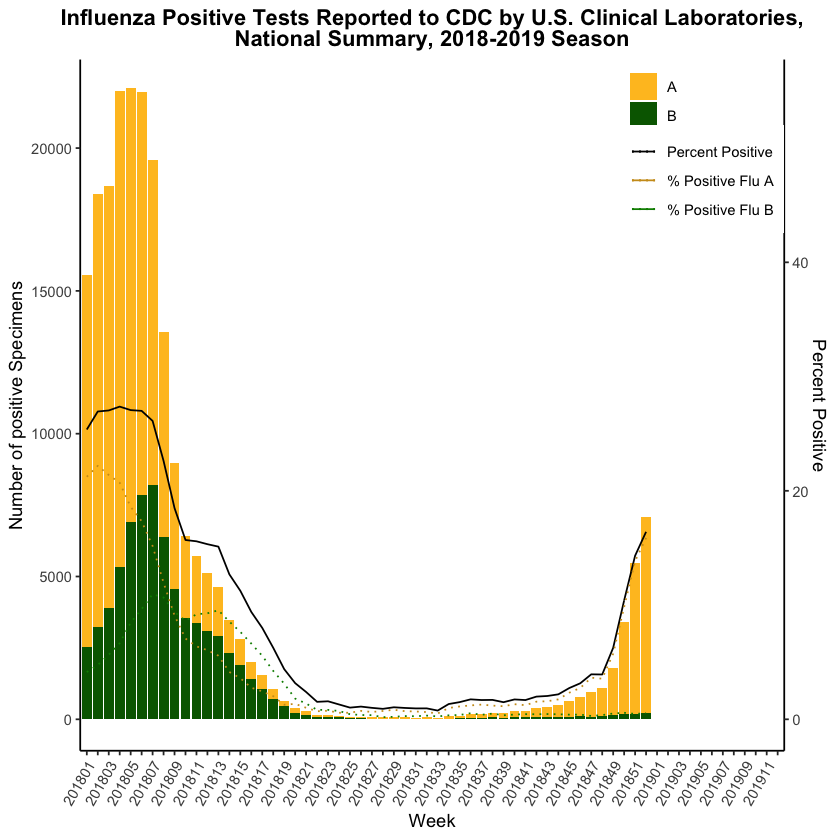

In [4]:

library("ggplot2")
ns1<-read.csv("ns_part5_1.csv")
data1<-data.frame(x=format(ns1$YEARWEEK,scientific=FALSE),y=ns1$COUNT,fill_var=ns1$TYPE)
TOTAL_A <- subset(ns1, ns1$COUNT > 0)
my_breaks <- format(ns1$YEARWEEK,scientific=FALSE)
label_fill <- function(orig, .offset=0, .mod=4, .fill=""){
    ## replace
    ii <- as.logical(
        ## offset==0 keeps first
        (1:length(orig)-1+.offset) %% .mod
    )
    orig[ii] <- .fill
    orig
}
PERCENT_POSITIVE<- subset(ns1, ns1$PERCENT.POSITIVE > 0)
p<-ggplot() +ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\nNational Summary, 2018-2019 Season")+
geom_bar(data1,mapping=aes(x=data1$x,y=data1$y,fill=data1$fill_var),stat = "identity")
q<-p +labs( x="Week", y="Number of positive Specimens")+coord_cartesian(ylim = c(0,22000))+theme(axis.text.x = element_text(angle = 60, hjust = 1))
a<-q+scale_y_continuous(sec.axis = sec_axis(~ ./400, name = "Percent Positive"))+geom_path(PERCENT_POSITIVE,mapping = aes(x =format(PERCENT_POSITIVE$YEARWEEK,scientific=FALSE), y = PERCENT_POSITIVE$PERCENT.POSITIVE*400,group = 3,color="PP"))+geom_path(TOTAL_A,mapping = aes(x =format(TOTAL_A$YEARWEEK,scientific=FALSE), y = TOTAL_A$PERCENT.A*400,group = 3,color="PPA"),linetype = "dotted")
mygraph<- a+geom_path(TOTAL_A,mapping = aes(x =format(TOTAL_A$YEARWEEK,scientific=FALSE), y = TOTAL_A$PERCENT.B*400,group = 4 , color="PPB"),linetype = "dotted")+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black"))
mynewgraph <-mygraph+ scale_color_manual(name="",labels = c("Percent Positive", "% Positive Flu A","% Positive Flu B"),values = c("PP"= "black", "PPA"="goldenrod3","PPB"="green4"))+ scale_fill_manual("",labels=c("A","B"),values=c("A"="goldenrod1","B"="dark green"))+theme(legend.key = element_blank(),legend.justification = c(1, 1), legend.position = c(1, 1),legend.spacing.y = unit(-0.3, "cm"),plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))
mynewgraph + scale_x_discrete(breaks=my_breaks, labels=label_fill(my_breaks, .mod=4))

chart 2

This data is from Public health Laboratories for 2018 1-52 weeks.
We have used ggplot2 to make this graph along with geom_bars for all the strains.
Bars for strains are stacked on top in the order specified in legend.
We can see that intial years of 2018 had a lot of positive cases and the same trend can be seen being developed by the end of 2018 with increasing values near the end.

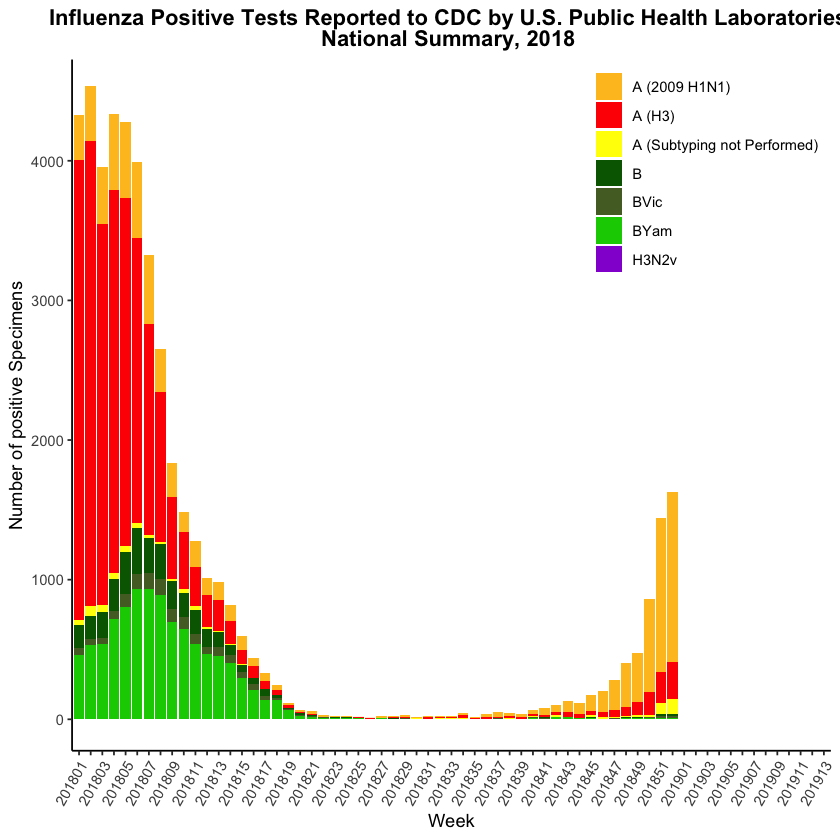

In [5]:
library("ggplot2")

ps1<-read.csv("ps2.csv")

my_breaks <- format(ps1$YEARWEEK,scientific=FALSE)
label_fill <- function(orig, .offset=0, .mod=2, .fill=""){
     ## replace
    ii <- as.logical(
        ## offset==0 keeps first
        (1:length(orig)-1+.offset) %% .mod
    )
    orig[ii] <- .fill
    orig
}

p<-ggplot() +ggtitle("Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories,\nNational Summary, 2018 ")+ geom_bar(aes(y = ps1$COUNT, x = format(ps1$YEARWEEK,scientific=FALSE), fill = ps1$TYPE),stat="identity",position = position_stack(reverse = FALSE))
x<-p+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black"))
w<-x+labs( x="Week", y="Number of positive Specimens")+coord_cartesian(ylim = c(0,4500))+theme(axis.text.x = element_text(angle = 60, hjust = 1))
mynewgraph<-w+ scale_fill_manual("",values=c("A (Subtyping not Performed)"="yellow","A (2009 H1N1)"="goldenrod1","A (H3)"="red","H3N2v"="darkviolet","B"="darkgreen","BVic"="darkolivegreen","BYam"="green3"))+theme(legend.key = element_blank(),legend.justification = c(1, 1), legend.position = c(1, 1),legend.spacing.y = unit(-0.3, "cm"),plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))
mynewgraph + scale_x_discrete(breaks=my_breaks, labels=label_fill(my_breaks, .mod=2)) 



part 6

graph 1

This data is from clinical Laboratories but with data from 2018 1-52 weeks but only for New York region.
We have used ggplot2 to make this graph along with geom_bar and geom_path.
For additional axis, we have used scale_y_continuous for the secondary y axis. 
A and B bars according to data are stacked on top of each other.

We can see that intial years of 2018 had a lot of positive cases and the same trend can be seen being developed by the end of 2018 with increasing values near the end.

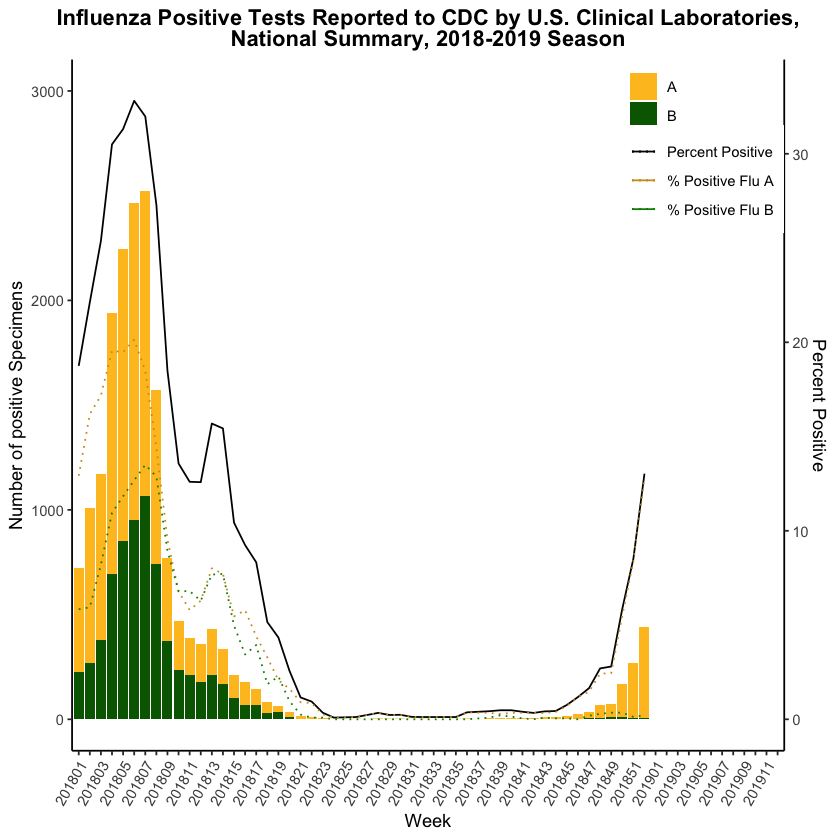

In [6]:
library("ggplot2")
ns1<-read.csv("ns_part6.csv")
data1<-data.frame(x=format(ns1$YEARWEEK,scientific=FALSE),y=ns1$COUNT,fill_var=ns1$TYPE)
TOTAL_A <- subset(ns1, ns1$COUNT > 0)
my_breaks <- format(ns1$YEARWEEK,scientific=FALSE)
label_fill <- function(orig, .offset=0, .mod=4, .fill=""){
    ## replace
    ii <- as.logical(
        ## offset==0 keeps first
        (1:length(orig)-1+.offset) %% .mod
    )
    orig[ii] <- .fill
    orig
}
PERCENT_POSITIVE<- subset(ns1, ns1$PERCENT.POSITIVE > 0)
p<-ggplot() +ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\nNational Summary, 2018-2019 Season")+
geom_bar(data1,mapping=aes(x=data1$x,y=data1$y,fill=data1$fill_var),stat = "identity")
q<-p +labs( x="Week", y="Number of positive Specimens")+coord_cartesian(ylim = c(0,3000))+theme(axis.text.x = element_text(angle = 60, hjust = 1))
a<-q+scale_y_continuous(sec.axis = sec_axis(~ ./90, name = "Percent Positive"))+geom_path(PERCENT_POSITIVE,mapping = aes(x =format(PERCENT_POSITIVE$YEARWEEK,scientific=FALSE), y = PERCENT_POSITIVE$PERCENT.POSITIVE*90,group = 3,color="PP"))+geom_path(TOTAL_A,mapping = aes(x =format(TOTAL_A$YEARWEEK,scientific=FALSE), y = TOTAL_A$PERCENT.A*90,group = 3,color="PPA"),linetype = "dotted")
mygraph<- a+geom_path(TOTAL_A,mapping = aes(x =format(TOTAL_A$YEARWEEK,scientific=FALSE), y = TOTAL_A$PERCENT.B*90,group = 4 , color="PPB"),linetype = "dotted")+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black"))
mynewgraph <-mygraph+ scale_color_manual(name="",labels = c("Percent Positive", "% Positive Flu A","% Positive Flu B"),values = c("PP"= "black", "PPA"="goldenrod3","PPB"="green4"))+ scale_fill_manual("",labels=c("A","B"),values=c("A"="goldenrod1","B"="dark green"))+theme(legend.key = element_blank(),legend.justification = c(1, 1), legend.position = c(1, 1),legend.spacing.y = unit(-0.3, "cm"),plot.title = element_text(lineheight=.8, face="bold",hjust=0.5))
mynewgraph + scale_x_discrete(breaks=my_breaks, labels=label_fill(my_breaks, .mod=4))

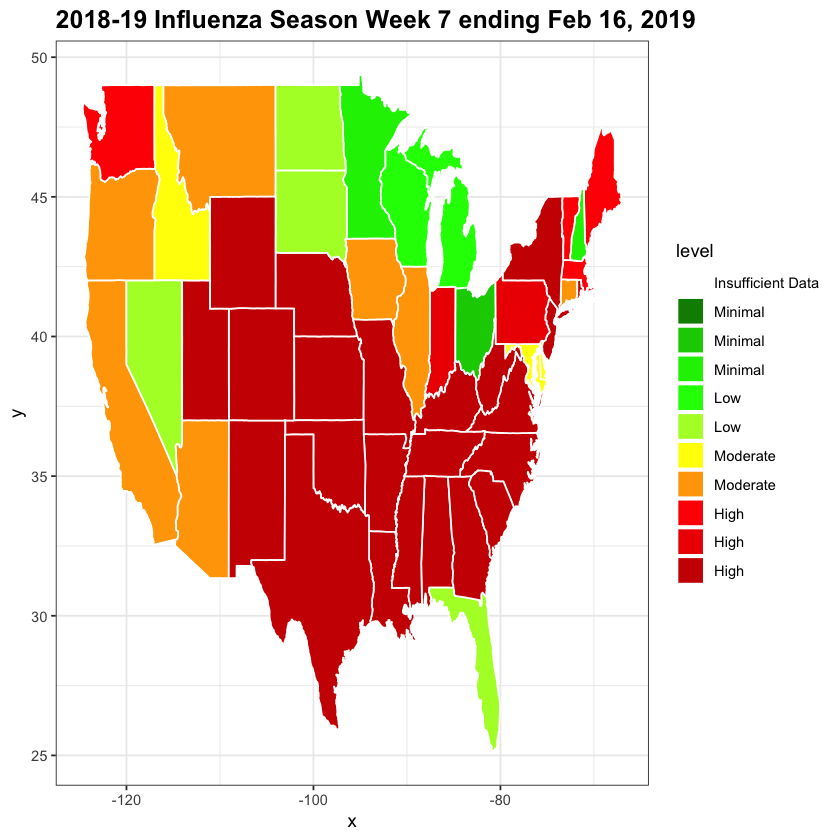

In [4]:
library(dplyr)
library(tidyr)
library(ggmap)

us_map <- map_data("state")
stateData_full <- read.csv("StateDataforMap_2018-19week7.csv", header=T)
stateData = data.frame(region=tolower(stateData_full$STATENAME), level=stateData_full$ACTIVITY.LEVEL, stringsAsFactors=F)
stateData[,2] <- substring(stateData[,2],6,8)
stateData$level <- (as.numeric(stateData$level)+11)
stateData$level <- (as.character(stateData$level))
register_google(key = Sys.getenv("GoogleAKey"))
ggplot(data=stateData, aes(map_id = region)) + 
    geom_map(aes(fill = level), map = us_map,colour='white')+
scale_fill_manual(values = c("white","green4", "green3", "green2","green", "greenyellow","yellow", "orange","red1", "red2", "red3"),labels = c("Insufficient Data","Minimal", "Minimal", "Minimal","Low", "Low", "Moderate","Moderate", "High","High", "High"))+
 theme_bw()+
    expand_limits(x = us_map$long, y = us_map$lat)+
ggtitle("2018-19 Influenza Season Week 7 ending Feb 16, 2019")+
theme(plot.title = element_text(size = 15, face = "bold"))
